# DSO105 Intermediate Stats L4 - R (pages 1-7)

## Basic ANOVAs

In [1]:
#### Page 1

In [2]:
## load libraries

install.packages('rcompanion')
install.packages('car')
install.packages('readxl')

library(tidyverse)
library(IDPmisc)
library(rcompanion)
library(car)
library(readxl)


The downloaded binary packages are in
	/var/folders/17/1s12c7d93tz_93j94s44qsl40000gn/T//RtmpXijDV1/downloaded_packages

The downloaded binary packages are in
	/var/folders/17/1s12c7d93tz_93j94s44qsl40000gn/T//RtmpXijDV1/downloaded_packages

The downloaded binary packages are in
	/var/folders/17/1s12c7d93tz_93j94s44qsl40000gn/T//RtmpXijDV1/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




## Introduction

Through this course, thus far you have only dealt with statistical tests with one x variable and one y variable. Now, you'll begin working with statistics that can handle more than one x! 

This branch of statistics is called multivariate statistics, since it deals with multiple variables. The first multivariate statistic you will encounter is the ANOVA, which stands for analysis of variance.

### What is an Anova?

* ANalysis Of VAriance

* Compare 2 or more means: -- IV = 1+categorical w/2+ levels. -- DV = 1 continuous

* One-Way = 1 IV (most simple)

### Assumptions for ANOVAs

* Normality (bell-curve)

* Homogeneity of Variance - equal amount of change among the groups

* Sample Size - 20 rows per IV

* Independence - groups are unrelated

#### To Test Homogeneity of Variance:

* Bartlett's or Fligner's test -- bartlett.test(DV ~ IV, data=df), fligner.test(DV ~ IV, data=df)

* you want a p value > .05 to pass the assumption

* if you don't pass, use the Welch's One-Way Test



### ANOVA

* with homogeneity of variance -- modelName = aov(DV ~ IV)

* w/o homogeneity of variance -- modelName = lm(DV ~ IV, data=df) -> Anova(modelName, Type='II', white.adjust = TRUE)

#### What are Post Hocs

* post hoc literally means "after this" in latin

* What you do AFTER an analysis to make sense of it

* pairwise.t.test(DV, IV, p.adjust='bonferroni')

* then use dplyr aggregation to get means for each category



In [3]:
## load data from video

BorderCrossing = read.csv('../Data/BorderCrossing.csv')

In [4]:
head(BorderCrossing)

,Port.Name,State,Port.Code,Border,Date,Measure,Value
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
1,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Personal Vehicle Passengers,1414
2,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Personal Vehicles,763
3,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Truck Containers Empty,412
4,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Truck Containers Full,122
5,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Trucks,545
6,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 0:00,Bus Passengers,1174


In [5]:
## had to convert it to csv to get it loaded

#### Test Assumptions

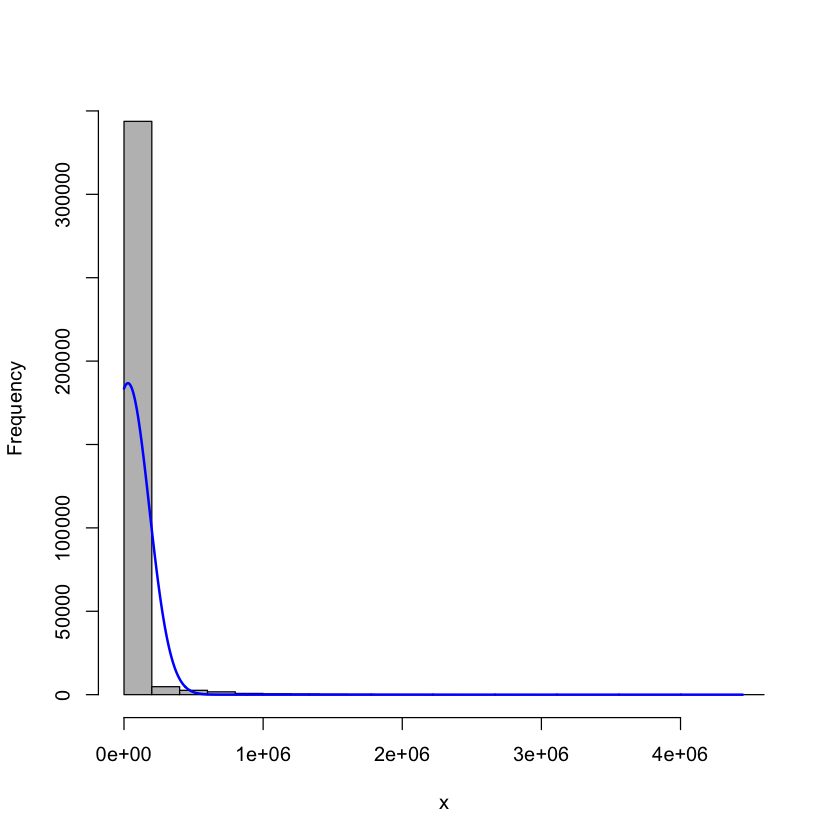

In [6]:
plotNormalHistogram(BorderCrossing$Value)

#### square root

In [7]:
BorderCrossing$ValueSQRT = BorderCrossing$Value ^ (1/2)

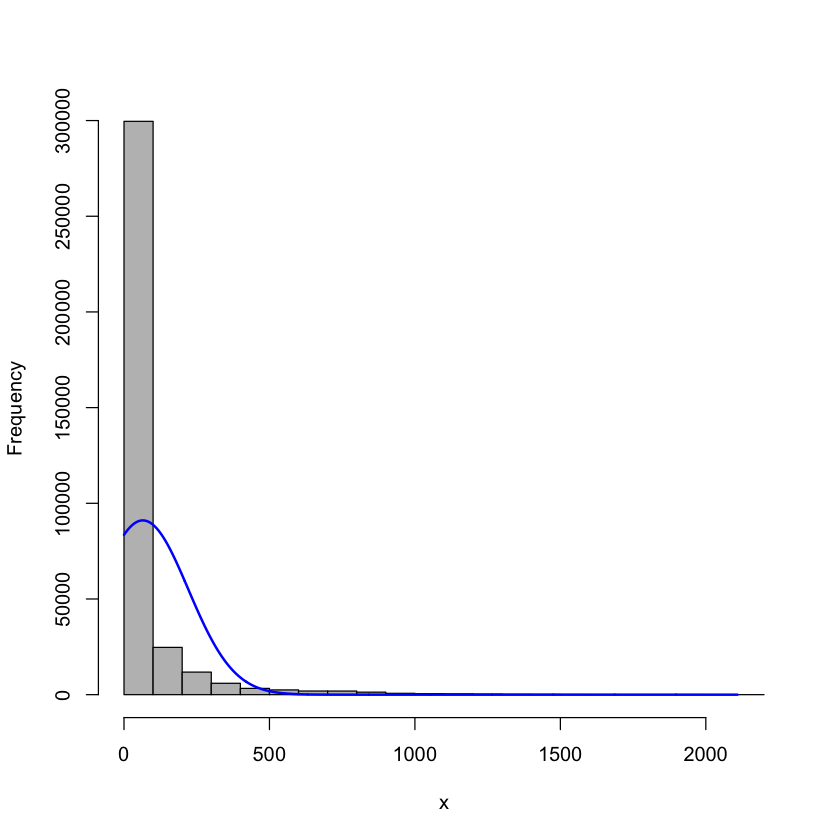

In [8]:
plotNormalHistogram(BorderCrossing$ValueSQRT)

#### log

In [9]:
BorderCrossing$ValueLOG = log(BorderCrossing$Value)

In [10]:
plotNormalHistogram(BorderCrossing$ValueLOG)

ERROR: Error in seq.default(min(x), max(x), length = length): 'from' must be a finite number


In [ ]:
## infinites are missing. drop them

In [11]:
BorderCrossing2 = NaRV.omit(BorderCrossing)

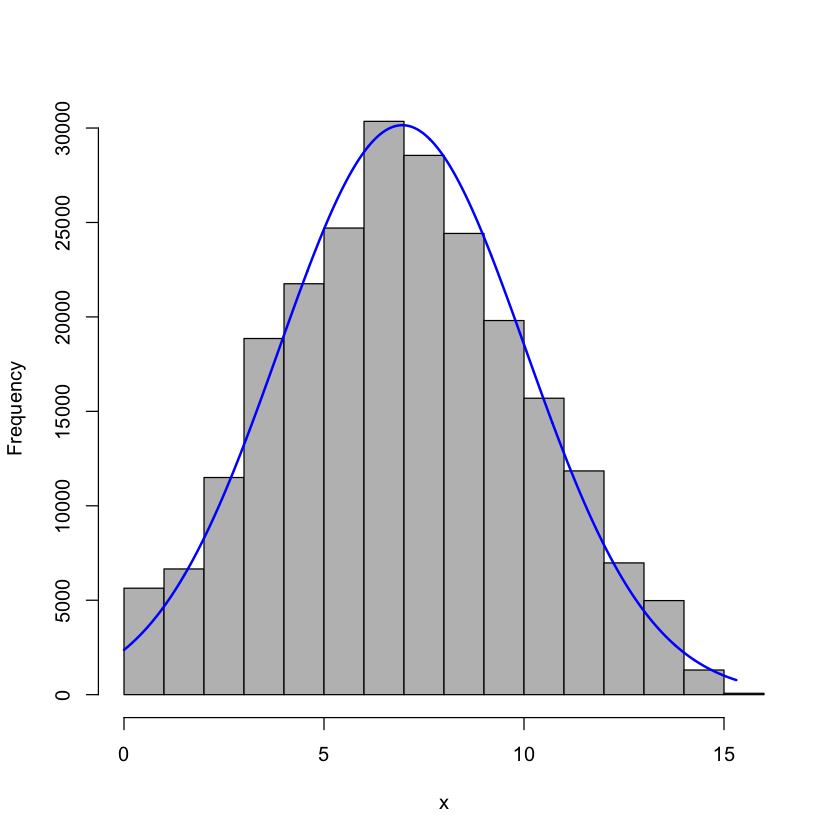

In [12]:
plotNormalHistogram(BorderCrossing2$ValueLOG)
## looks normal

#### Homogeneity of Variance

either bartlett or fligner test

In [13]:
bartlett.test(ValueLOG ~ Measure, data = BorderCrossing2)


	Bartlett test of homogeneity of variances

data:  ValueLOG by Measure
Bartlett's K-squared = 21600, df = 11, p-value < 2.2e-16


In [14]:
## this p-value shows significance, which means we have violated the assumption of homogeneity of variance
## we either have heterogeneity of variance, or unequal variance

### ANOVA without homogeneity of variance

In [15]:
anova = lm(ValueLOG ~ Measure, data = BorderCrossing2)

In [16]:
Anova(anova, Type ='II', white.adjust = TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
Measure,11,18104.53,0
Residuals,233107,NA,NA


In [17]:
## this is not showing the p-value like in the video/R Studio

#### Post Hocs

In [18]:
pairwise.t.test(BorderCrossing$Value, BorderCrossing$Measure, p.adjust = 'bonferroni', pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  BorderCrossing$Value and BorderCrossing$Measure 

                            Bus Passengers Buses   Pedestrians
Buses                       < 2e-16        -       -          
Pedestrians                 < 2e-16        < 2e-16 -          
Personal Vehicle Passengers < 2e-16        < 2e-16 < 2e-16    
Personal Vehicles           < 2e-16        < 2e-16 < 2e-16    
Rail Containers Empty       < 2e-16        < 2e-16 < 2e-16    
Rail Containers Full        < 2e-16        < 2e-16 < 2e-16    
Train Passengers            < 2e-16        7.4e-11 < 2e-16    
Trains                      < 2e-16        < 2e-16 < 2e-16    
Truck Containers Empty      < 2e-16        < 2e-16 < 2e-16    
Truck Containers Full       1.3e-13        < 2e-16 < 2e-16    
Trucks                      < 2e-16        < 2e-16 < 2e-16    
                            Personal Vehicle Passengers Personal Vehicles
Buses                       -                          

In [19]:
crossingMeans = BorderCrossing %>% group_by(Measure) %>% summarise(Mean = mean(Value)) %>% arrange(desc(Mean))

In [20]:
View(crossingMeans)

Measure,Mean
<chr>,<dbl>
Personal Vehicle Passengers,179352.83408
Personal Vehicles,84376.62418
Pedestrians,37116.27784
Trucks,8563.49689
Truck Containers Full,6041.53997
Bus Passengers,4953.43874
Truck Containers Empty,2176.42398
Rail Containers Full,1447.40671
Rail Containers Empty,799.08617


### End of video

In [21]:
#### Page 2 (starts with video)

Types of Anova: 1. Between Subjects Anova - categorical w/2+ lvls (IV), 1 continuous (DV) -- LEVELS OF THE INDEPENDENT VARIABLE ARE NOT RELATED

#### like 3 tacos from differnt restaurants, and their respective heat rating

2. Within Subjects Anova - categorical w/2+ related groups (IV), 1 continuous (DV)

#### like testing stomach lining thickness across 3 weeks after eating the tacos

## ANOVA Types by the Number of IVs

* One Way - only one IV

* Factorial - more than one IV - named by number of IVs (2IVs = 2 Way ANOVA, 3IVs = 3 Way Anova, etc.)

## Two-Way ANOVA example

IV1 is 1 of 3 Mexican restaurants. IV2 is the amount of chili pepper in each taco. DV is heat rating, continuous variable

### Mixed Measures ANOVA

IV1 is testing tacos over 3 weeks after eating. IV2 is different amount of pepper. DV is continuous variable: thickness of stomach lining

# What is an ANOVA?

ANOVAs are wonderful! You will quickly fall in love with them! They are versatile, robust, and relatively simple to understand and conduct. 

ANOVAs are where your true intermediate statistics journey begins.

You can think of an ANOVA as a t-test on steroids. Depending on the type of ANOVA, it can either replace your independent t test, your dependent t test, or it can even handle BOTH scenarios at once. 

Is your mind blown yet? Ready to convert to ANOVAs for life?

You will use an ANOVA to compare the means of the different levels of an independent variable(s). The independent variable will be a categorical variable. 

Unlike your independent t-test, which can only handle two levels of the independent variable, or two groups at a time, the ANOVA can handle more than two levels of your independent variable. 

The dependent variable will remain continuous, and there is still only one. 

So, if you have a theoretical example in which you want to determine whether color affects the fluffiness of a dog's coat, in a t-test, you could only compare two different coat colors at a time. Maybe black and white. 

But with an ANOVA, you can look at more than two levels of the independent variable, so you can compare more coat colors at a time - maybe black, white, apricot, and brown. 

In this scenario, the coat color is the independent variable, also sometimes called the grouping variable, because it is made up of groups, 

and the dependent variable is a continuous measure of coat fluffiness, for each dog you have in your sample.

Basically, the concept behind the ANOVA is that you are seeing if the variance in the dependent variable is in any way related to the grouping of the independent variable. 

Is there a pattern, in which certain groups have higher or lower means?

# Types of ANOVAs

There are two different types of ANOVAs: between subjects and within subjects ANOVAs.

<img src="../../media/between-within-subjects.jpg" align="left" alt="COE image" width = "600">

# Between Subjects ANOVAs

Between Subjects ANOVAs fall in the same class as independent t-tests and independent Chi-Squares. All of these analyses look for differences between two separate, or independent, groups. 

There is no overlap between one group and the next. It is called a between subjects ANOVA because you are looking at mean difference between people, often called subjects in a research study.

Tip!: Sometimes in the biological fields, this is called a Type I ANOVA instead of a between subjects ANOVA.

# Within Subjects ANOVAs

Within Subjects ANOVAs fall in the same class as dependent t-tests. They are used when you have paired data or related samples. 

Most often, this is done by looking at change over time. However, a dependent t-test can only handle a pre- and post-test design, whereas, since ANOVAs can have multiple levels, they can handle additional timepoints. 

Anything from "beginning, middle, end" designs to looking at time bins for time periods can be done with an ANOVA.

Within subjects ANOVAs get their name because you are looking at the same person, or research subject, over and over again. 

Because within subjects ANOVAs are so often used to look at things over time, they are often called repeated measures ANOVAs as well.

Tip!: Sometimes in the biological fields, this is called a Type II ANOVA instead of a within subjects ANOVA.

# Number of Independent Variables

With both between and within subjects ANOVAs, you can also add a clarifier on that deals with the number of independent variables. 

So there are also one-way and factorial ANOVAs, which can be either between or within subjects.

# One-Way ANOVAs

When an ANOVA has only one independent variable, regardless of the number of levels, than this is called a one-way ANOVA.

In [22]:
## only 1 x

# Factorial ANOVAs


When there is more than one independent variable, than as a whole, it is a factorial ANOVA. 

However, ANOVAs are typically named by the number of independent variables they contain, so if you had two independent variables, it would be called a two-way ANOVA, 

and if you had three independent variables, it would be called a three-way ANOVA, etc. 

Although there is no limit to the number of independent variables you can have in an ANOVA, as long as you have enough data, 

practically going above a three or four way ANOVA becomes very difficult to interpret, so it is not recommended.

In [23]:
## more than 1 x

# Mixed Measures ANOVAs

In a factorial ANOVA, where there are multiple variables, you can mix and match your variables, so that there is one or more between subjects variables as well as a within subject variable. 

This is called a mixed measures or mixed design ANOVA.

In [24]:
## combines within subjects and between subjects

In [25]:
#### Page 3 (Basic ANOVAs)

In [26]:
## from video

# only Within Subjects designs needs to worry about Sphericity

Minimum smaple size for an ANOVA is at least 20 cases per independent variable

# Assumptions for ANOVAs

Just like any statistical test, there are assumptions for ANOVAs that you need to meet in order for them to be the most effective and the least biased.

### Normality

This assumption should be very familiar to you! Just like most statistics, ANOVAs require your data to be normally distributed, or distributed as close to normal as possible. 

If your data are not normal, they will need to be transformed to approximate the normal distribution. Luckily, the ANOVA is relatively robust, so especially as your sample size increases, 

and if you keep your group sizes relatively equal, it can handle some deviations from normality.

### Homogeneity of Variance

On the simplest level, homogeneity of variance means the variance, or the spread of data, is equal. The root homo means same, so think of homogeneity as "same variance." In the context of an ANOVA assumption, 

it means that the variance of one variable should not affect the variance of another variable.

It's probably easier to look at an illustration:

<img src="../../media/ANOVA homogeneity of variance example.png" align="left" alt="COE image" width = "600">

See how the means change some along the x axis, from the first curve to the second curve, but that the actual spread of the data is relatively the same? 

The distance between the highest and the lowest dot on the first curve is approximately the same as the distance between the highest and lowest dot on the second curve, 

but the actual placement of those dots is relative to the mean.

If some of these curves had a really wide spread of data, or a really small spread, then that wouldn't be equal variance. 

Instead, the variance would be unequal, which is also called heterogeneity of variance. The root word hetero means difference, so you can think of heterogeneity as "difference variance."

### Sample Size

You must have an adequate sample size in order for ANOVAs to effectively test for differences between groups. 
    
Typically, a higher sample size is required the more complex your analysis is, and ANOVAs are no exception. You must have a least 20 cases per independent variable.

### Independence

The assumption of independence means that your groups must be unrelated, or independent, of each other (except for within subjects designs). 
                                                                                                        
You could theoretically test this by correlating each level of your independent variables with each other, but it's typically not done. 

Really, meeting the assumption of independence is just more about how you are setting up your "experiment" or choosing your data to analyze. 

Make sure that there is no overlap between your groups and that the levels you are testing are not related in some way, like having the same people.

If you don't meet the assumption of independence, you are much more likely to commit Type I error, saying something is significant when it's really not. 

And there's no way to correct for this assumption - it's better just to not run an ANOVA if you feel you have violated the assumption of independence.

### Sphericity (for Within Subjects Designs Only) 

**THE ABOVE NEEDS TO BE CHANGED IN CURRICULUM**

Sphericity is a lot like homogeneity of variance, but applies specifically to repeated measures or within subjects designs. 

Say, for instance, you are measuring the activity level of dogs in their first year, second year, third year, and fourth year. 

If there is sphericity, then the association between each set of years should be approximately the same: 1 - 2, 1-3, 1-4, 2-3, and 2-4. 

However, when you're dealing with changes over time, it is often likely that things that happen closer together in time are more closely associated with each other. 

As your dog ages, you would expect that he or she would become a little less energetic. So the correlation between year 1 and year 2 activity rates is probably much 

higher than the correlation between the year 1 and year 4 activity rates, for instance. When sphericity is present in a between subjects design, there are many ways in which you can correct for it.



In [27]:
#### Page 4

In [28]:
## video with salon data

In [32]:
## load data

salon = read.csv('../Data/client_cancellations.csv')

In [33]:
head(salon)

,cancel.date,cancel.date.month,code,service.code,service.desc,staff,booking.date,booking.date.month,canceled.by,days.in.adv,avg.price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,3/10/2018,March,KOOM01,SHCW,Women's hair cut,JJ,4/3/2018,April,JJ,24,88.44
2,3/27/2018,March,WIL*01,SHCW,Women's hair cut,JJ,3/29/2018,March,JJ,2,88.44
3,4/3/2018,April,BUDG02,SHCM,Men's hair cut,SINEAD,4/21/2018,April,BECKY,18,41.41
4,4/3/2018,April,HILJ01,CFC,Color full color,KELLY,4/3/2018,April,JJ,0,63.13
5,4/3/2018,April,STEM01,SHCW,Women's hair cut,BECKY,4/21/2018,April,JJ,18,67.84
6,4/3/2018,April,STRH01,CHLFH,Highlights full,KELLY,4/4/2018,April,JJ,1,120.00


In [34]:
## Do some staff members sell more services and products than others?

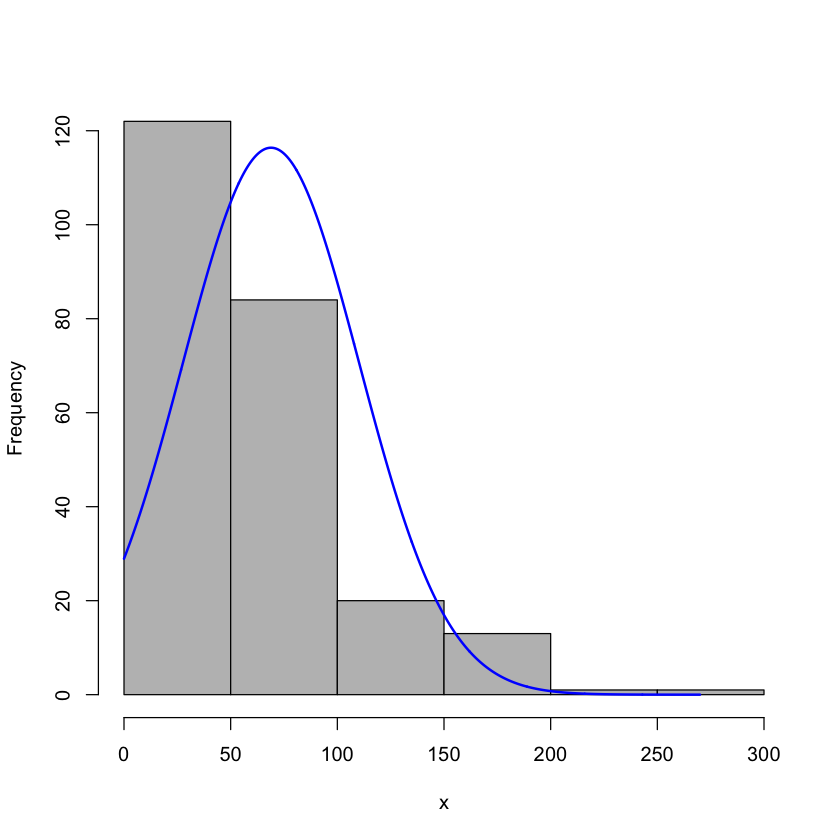

In [35]:
plotNormalHistogram(salon$avg.price)

## tail on right - looks positively skewed
## adjust it

In [36]:
salon$avg.priceSQRT = sqrt(salon$avg.price)

In [37]:
head(salon)

,cancel.date,cancel.date.month,code,service.code,service.desc,staff,booking.date,booking.date.month,canceled.by,days.in.adv,avg.price,avg.priceSQRT
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,3/10/2018,March,KOOM01,SHCW,Women's hair cut,JJ,4/3/2018,April,JJ,24,88.44,9.404254
2,3/27/2018,March,WIL*01,SHCW,Women's hair cut,JJ,3/29/2018,March,JJ,2,88.44,9.404254
3,4/3/2018,April,BUDG02,SHCM,Men's hair cut,SINEAD,4/21/2018,April,BECKY,18,41.41,6.435060
4,4/3/2018,April,HILJ01,CFC,Color full color,KELLY,4/3/2018,April,JJ,0,63.13,7.945439
5,4/3/2018,April,STEM01,SHCW,Women's hair cut,BECKY,4/21/2018,April,JJ,18,67.84,8.236504
6,4/3/2018,April,STRH01,CHLFH,Highlights full,KELLY,4/4/2018,April,JJ,1,120.00,10.954451


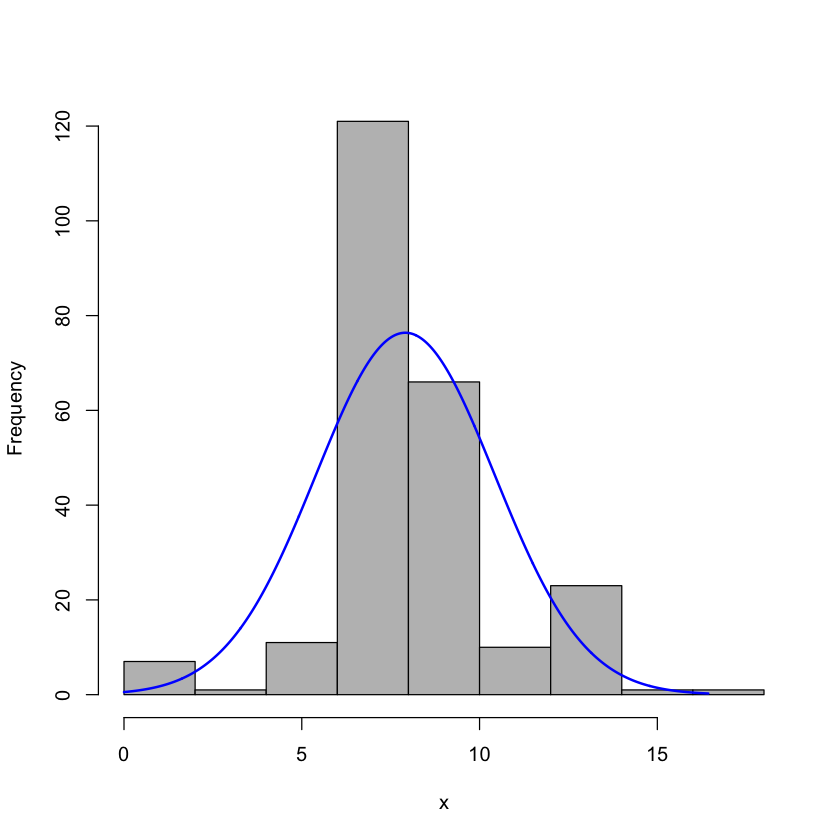

In [38]:
plotNormalHistogram(salon$avg.priceSQRT)
## looks approximately distributed

In [39]:
## test for assumption of homogeneity of variance

## Bartlett's Test - when data is normally distributed
## Fligner's Test - when data is non-parametric (not normally distributed)

##### to pass this test and the assumption we want results to be non-significant

##### idea is that if p-value is less than .05, it is siginifacant and you have found unequal variance, thus violating the assumption of homoageneity of variance

In [40]:
bartlett.test(avg.priceSQRT ~ staff, data = salon)


	Bartlett test of homogeneity of variances

data:  avg.priceSQRT by staff
Bartlett's K-squared = 55.268, df = 5, p-value = 1.15e-10


In [41]:
fligner.test(avg.priceSQRT ~ staff, data = salon)


	Fligner-Killeen test of homogeneity of variances

data:  avg.priceSQRT by staff
Fligner-Killeen:med chi-squared = 38.057, df = 5, p-value = 3.676e-07


In [42]:
#### assumption of homogeneity of variance is violated

In [ ]:
## data independence - do any of the salon staff overlap in any way? --- One Way Between Subjects ANOVA in salon data video will be continued on next page

In [ ]:
## end of video - on to Page 4 text

### One Way Between Subjects ANOVAs in R

Now that you have a basic idea about what an ANOVA is, you will learn how to create ANOVAs in R, starting with the One Way ANOVA.

In [44]:
## load data
apps = read.csv('../Data/googleplaystore.csv')

In [45]:
head(apps)

,X,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
2,2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
3,3,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
4,4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
5,5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
6,6,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up


#### Question Setup

With this data, you will answer the question:

Is there a difference in price among the three app categories of beauty, food and drink, and photography? 


In order to answer this question, your x, or independent variable, will be the app categories, which has three levels: beauty, food and drink, and photography. 

Your y, or dependent variable, will be the price. As with all ANOVAs, the IV will be categorical, and the DV will be continuous.

#### Data Wrangling

Depending on the data that you've been given, it may need some wrangling!

#### Filter the Data and Remove Missing Values

In this case, the data has many more categories than three, so you will need to filter the dataset by the categories you want: beauty, food and drink, and photography.

In [46]:
apps1 <- na.omit(apps %>% filter(Category %in% c("BEAUTY", "FOOD_AND_DRINK", "PHOTOGRAPHY")))

In [47]:
head(apps1)

,X,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,99,Hush - Beauty for Everyone,BEAUTY,4.7,18900,17M,"500,000+",Free,0,Everyone,Beauty,2-Aug-18,6.10.1,5.0 and up
2,100,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,"1,000,000+",Free,0,Everyone,Beauty,9-Nov-17,2.3.0,4.1 and up
3,101,Natural recipes for your beauty,BEAUTY,4.7,1150,9.8M,"100,000+",Free,0,Everyone,Beauty,15-May-18,4,4.1 and up
4,102,"BestCam Selfie-selfie, beauty camera, photo editor",BEAUTY,3.9,1739,21M,"500,000+",Free,0,Everyone,Beauty,12-Jul-18,1.0.6,4.0.3 and up
5,103,Mirror - Zoom & Exposure -,BEAUTY,3.9,32090,Varies with device,"1,000,000+",Free,0,Everyone,Beauty,24-Oct-16,Varies with device,Varies with device
6,104,Beauty Selfie Camera,BEAUTY,4.2,2225,52M,"500,000+",Free,0,Everyone,Beauty,28-Feb-18,1.6,4.1 and up


Now you are all prepared to run a one-way ANOVA.

#### Make Price Numeric

You will also need to make your dependent variable, price, numeric, 

so that you can test for some of your assumptions:

In [48]:
unique(apps1$Price)

[1] "0"      "3.49 "  "4.99 "  "5.99 "  "2.99 "  "3.95 "  "1.49 "  "9.99 " 
 [9] "19.99 " "1.99 "

In [49]:
apps1$Price <- as.numeric(apps1$Price)

In [50]:
unique(apps1$Price)

[1]  0.00  3.49  4.99  5.99  2.99  3.95  1.49  9.99 19.99  1.99

In [51]:
## checking the columns data types

In [52]:
sapply(apps1, class)

X            App       Category         Rating        Reviews 
     "integer"    "character"    "character"      "numeric"    "character" 
          Size       Installs           Type          Price Content.Rating 
   "character"    "character"    "character"      "numeric"    "character" 
        Genres   Last.Updated    Current.Ver    Android.Ver 
   "character"    "character"    "character"    "character"

#### Test Assumptions

Before you go any further, it's important to test for assumptions. 

If the assumptions are not met for ANOVA, but you proceeded anyway, you run the risk of biasing your results.

#### Normality

You only need to test for the normality of the dependent variable, since the IV is categorical.

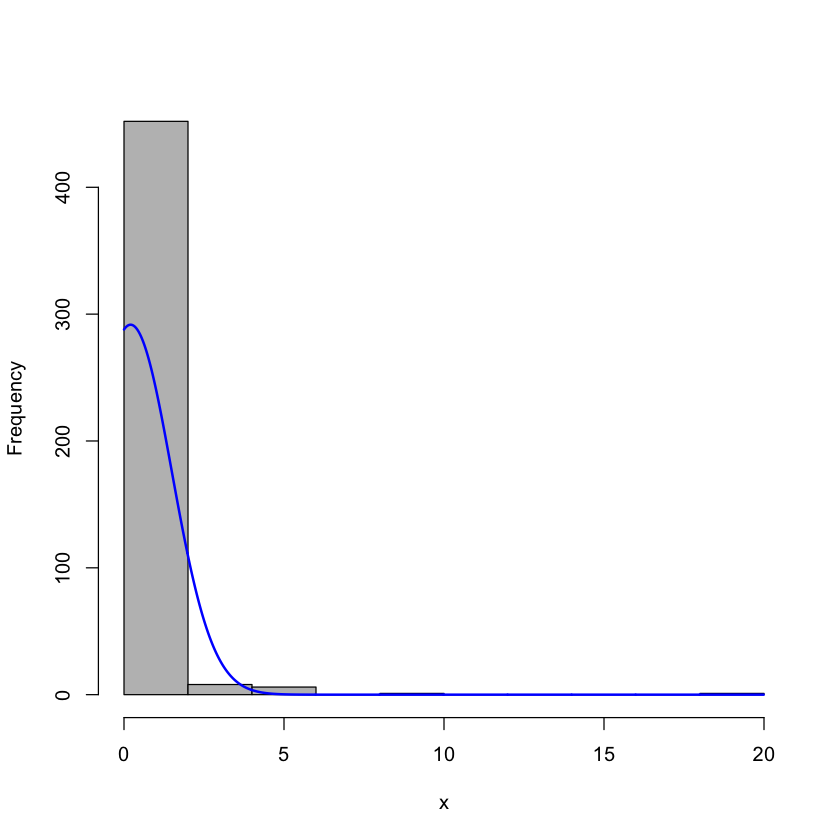

In [53]:
plotNormalHistogram(apps1$Price)

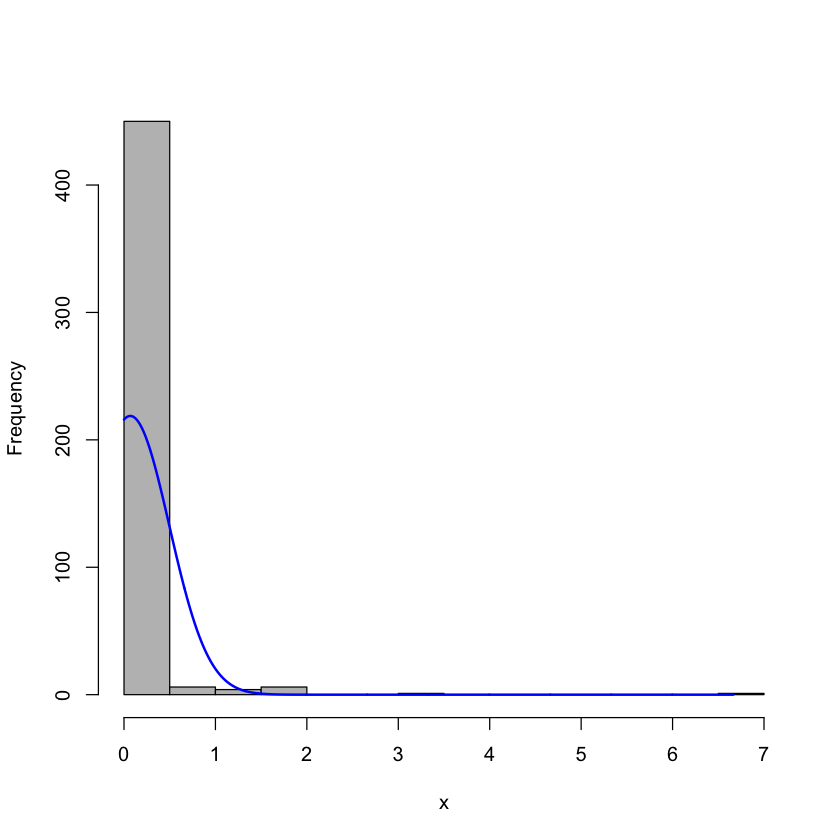

In [54]:
apps1$PriceCube <- apps1$Price ^ 1/3
plotNormalHistogram(apps1$PriceCube)

In [55]:
## these are not the results from the curriculum - I believe it is wrong

Looks like neither of these are really any better than the original, so you might as well keep the original data to ease interpretation. 

ANOVA is somewhat tolerant of violations of normality when you have a large sample size. 

Your other option would be to run another analysis that did not require normality.

#### Homogeneity of Variance

You can test for homogeneity of variance easily using either Bartlett's test or Fligner's Test. 

Bartlett's test is for when your data is normally distributed, and Fligner's test is for when your data is non-parametric. 

No matter which test you are using, you are looking for a non-significant test. The null hypothesis for both of these is that the data has equal variance, so you'd like to have a p value of > .05. You have already determined your data is not normally distributed, so ordinarily you would just perform Fligner's test, but just for learning purposes, you'll try both here.

#### Bartlett's Test

To do Bartlett's test, use the function bartlett.test(), with the argument of the y data separated by a tilde, followed by the x data. 

Then there's an argument data=, which is where you will specify the name of your dataset.

In [56]:
bartlett.test(Price ~ Category, data=apps1)


	Bartlett test of homogeneity of variances

data:  Price by Category
Bartlett's K-squared = Inf, df = 2, p-value < 2.2e-16


The p value associated with this test is < .05, which means that unfortunately, you have violated the assumption of homogeneity of variance.

#### Fligner's Test

To perform Fligner's test, use the function fligner.test(), with the argument of the y data separated by a tilde, followed by the x data. 

Then there's an argument data=, which is where you will specify the name of your dataset.

In [57]:
fligner.test(Price ~ Category, data=apps1)


	Fligner-Killeen test of homogeneity of variances

data:  Price by Category
Fligner-Killeen:med chi-squared = 4.878, df = 2, p-value = 0.08725


In [ ]:
## different output than curriculum

In [ ]:
## this may be wrong

#### Correcting for Violations of Homogeneity of Variance

There are two ways that you can correct for a violation of homogeneity of variance. 

The first is the BoxCox transformation of your data, and the second is running a slightly different type of ANOVA, one that was created specifically to handle this violation. 

That test is called the Welch One-Way Test, and you'll learn about this ANOVA option.

#### Sample Size

An ANOVA requires a sample size of at least 20 per independent variable. 

In this case, you only have one independent variable, so as long as you have at least 20 cases, you are fine. 

Looking at the data, the n is 515, so you are fine to proceed with this assumption!

#### Independence

There is no statistical test for the assumption of independence.

In [ ]:
#### Page 5

In [ ]:
## video

In [ ]:
head(salon)

In [ ]:
## 2 ways of doing 1 way ANOVAs in R

## when the data meets the Homogeneity of Variance assumption

## and when the data violates it

In [ ]:
salonAnova = aov(salon$avg.priceSQRT ~ salon$staff)

In [ ]:
## use summary()

summary(salonAnova)

In [ ]:
## p-value is significant at .001 as indicated by the stars
## This means there is a significant effect of staff member that influences how much a client spends

In [ ]:
## now using the ANOVA for when data violates assumption of Homogeneity of Variance

In [ ]:
salonANOVAhetero = lm(avg.priceSQRT ~ staff, data = salon)

In [ ]:
## next call the Anova() function

In [ ]:
Anova(salonANOVAhetero, Type="ii", white.adjust = TRUE)

In [ ]:
## p-value shows us their if significance
## but which staff member influences more?
## post hoc(ind. t.test done b/t ea. set of levels of IV)

In [ ]:
pairwise.t.test(salon$avg.priceSQRT, salon$staff, p.adjust = "none")

In [ ]:
## next we will run same test, but adjust for Type 1 error

In [ ]:
pairwise.t.test(salon$avg.priceSQRT, salon$staff, p.adjust = "bonferroni")

In [ ]:
## very much drastically different results
## these results are better - Joanne seems to differ from mostly everyone: is she better or worse? (go back and look at mean) - no using SQRT column

In [ ]:
salonMeans = salon %>% group_by(staff) %>% summarize(Mean = mean(avg.price))

In [ ]:
salonMeans
## we get a NA for staff member JJ - need to remove NAs with IDPmisc package and try again

In [ ]:
salon2 = NaRV.omit(salon)

In [ ]:
salonMeans = salon2 %>% group_by(staff) %>% summarize(Mean = mean(avg.price))
salonMeans

In [ ]:
## looks like Joanna is outselling every staff member - examine her technique and try to put into practice with rest of salon staff

In [ ]:
### End of video

In [ ]:
#### Page 5 Contents (One Way Between Subjects NOVA in R Part 2)

### Computing ANOVAs with Equal Variance (Met Homogeneity of Variance Assumption)

In this case, your data did not meet this assumption, but for the purposes of learning, you'll be shown what to do if you had.

Below is the code to run a one-way ANOVA in R. You can give your ANOVA a name; this one is named appsANOVA. 

Then you want to use the function aov(). The argument for this function is your y variable, which is continuous, followed by a tilde and then your x variable, which is categorical. 

Remember that the tilde reads as "by," so you can think of this as analyzing price by category.

In [ ]:
appsANOVA = aov(apps1$Price ~ apps1$Category)

In [ ]:
## we already changed Price to as.numeric() up above

Now that you have fixed Price as numeric, you can then run the ANOVA code above again. Luckily, no errors this time! But this by itself does not give you any information. You need to utilize the summary() function:

In [ ]:
summary(appsANOVA)
## different output then the curriculum

The first row of the output has the Df, or degrees of freedom. The row for your category is calculated as 1 - # of Levels, so that is always a good gut check. Next, you have rows for the Sum Sq and Mean Sq; these are just some of the calculations that went into getting your F value, which is the test statistic for an ANOVA. The real meat that you want to pay attention to is the F value itself and the associated p value next to it. Like anything else, if this value is less than .05, the test was significant. If you ever need a reminder of that, you can look at the star and Signif. codes down at the bottom - there's one star listed, so it is significant at .05.



In [ ]:
## there is no star chart with signif. codes. The p-value is also above .05 @ 0.203 (ie no significance)

### Computing ANOVAs with Unequal Variance (Violated Homogeneity of Variance Assumption)

If you need to correct for violating the assumption of homogeneity of variance, you can run an ANOVA that was meant to correct for that violation, using a Welch's One-Way Test. 

To do this, you will actually create a linear model first, and then use the function Anova() on it.

First, create and name a linear model that uses the same set up as the ANOVA with equal variance. Then, call the Anova() function on that named model, include the argument of Type= and set it to "II" because this is a between subjects ANOVA, and then use the argument white.adjust=TRUE. This last part, setting white.adjust= to TRUE, is what makes this ANOVA appropriate when you have unequal variance.

Here is the output R provides you with:

In [ ]:
ANOVA <- lm(Price ~ Category, data=apps1)
Anova(ANOVA, Type="ii", white.adjust=TRUE)

It provides a little less information in terms of the math behind calculating the F statistic, but really, all the information you need to interpret the data is there. This is significant at p < .001, so you can conclude that there is a significant difference in price somewhere between the three levels of your independent variable.

In [ ]:
## This is not my output

### Post Hocs

Now the problem with an ANOVA is that you have multiple groups. When you found significance with a t-test, you were able to just look at the means and you knew where the significant differences lie. You knew what was higher, and what was lower. But with an ANOVA, you can't just look at the means right away, because the F and associated p value just let you know that there is a difference between at least set of the three categories. In your example, the mean prices could be different between the beauty and food and drink category, the beauty and photography category, the food and drink and photography category, or some combination of those three!

That's where post hocs come in. They are specifically designed to test all the pairs between your data, which is why they are also often known as pairwise comparisons. This is done with t-tests. But the inherent problem with using multiple t-tests is that the more analyses you run, the more you increase your chances of Type I error. So you're more likely to find something significant when it really isn't. So, typically a post hoc will apply a correction, or adjustment, so that the t-tests become more stringent, and you are therefore correcting for doing multiple t-tests by applying stricter criteria. That way your Type I error doesn't run rampant!

There are many different corrections you can apply. But the most common ones you'll hear about are Tukey, Bonferroni, Holm, and Scheffe. All named by after the people who came up with them, by the way. These three are in order of how much correction they apply, with Tukey applying the least correction and Scheffe applying the most. Unfortunately, R does not compute Tukey and Scheffe automatically, so you'll stick to exploring the difference between no correction at all, and a Bonferroni correction

#### Computing Post Hocs with No Adjustment

Here is the code for computing a post hoc in R:

Use the pairwise.t.test() function, with the arguments of the two variables you are crossing, and the argument p.adjust=. To show you why a correction is necessary, you will start out with a value of "none", which means that no correction is being made for Type I error. Here are the results:

In [ ]:
pairwise.t.test(apps1$Price, apps1$Category, p.adjust="none")

In [ ]:
## this data must not be consistent with what the curriculum is using

What is presented in the matrix above is the p values for each t-test between the pairs of the levels of your independent variable. Reading this, you can see that there was not a significant difference in price between food and drink and beauty apps. There was also not a significant difference between the photography and beauty apps, though since this is close to .05, some researchers might say that that analysis is approaching significance or marginally significant and report it as a nominal finding. There is, however, a significant difference between the price of the food and drink and photography apps, at p = .03.

#### Computing Post Hocs with Bonferroni Adjustment

You may be pretty pleased with finding a significant difference in price between app categories. But guess what? 

That difference may not really exist, because by running three t-tests, you may have increased your Type I error. 

So, better to typically stick with some form of correction, like Bonferroni. It is relatively "mild," but gets the job done!

In [ ]:
pairwise.t.test(apps1$Price, apps1$Category, p.adjust="bonferroni")

In [ ]:
## a different result from curriculum yet again

### Computing Post Hocs When You've Violated the Assumption of Homogeneity of Variance

There is an easy solution to computing post hocs when you have violated the assumption of homogeneity of variance. 

You'll use the same codes as above, but include the argument pool.sd = FALSE at the end.

This provides a very similar output, the only difference being that is was calculated with non-pooled standard deviations, as noted at the top.

In [ ]:
pairwise.t.test(apps1$Price, apps1$Category, p.adjust="bonferroni", pool.sd = FALSE)

As you can see, once you've correct for this assumption, your results are more accurate, and your pairwise comparisons are actually significant now between both photography and beauty and photography and food and drink apps.

In [ ]:
## different output

#### Determine Means and Draw Conclusions

If you had found a significant difference after correction, you would want to then finish interpreting the results and draw some conclusions. 

To do that, you need to examine the means! Again, dplyr nicely comes to the rescue.

In [ ]:
appsMeans <- apps1 %>% group_by(Category) %>% summarize(Mean = mean(Price))

In [ ]:
appsMeans

Had you passed the corrected post-hoc with this data, you would have been able to look at the means and say that photography had a significantly lower price than food and drink apps. But, looking at these means, which are extremely close, it makes sense that this significant finding would "wash out" after Bonferroni correction. Is the difference between 89 cents and 92 cents really all that different?

In [ ]:
## again, this is different, very different

In [ ]:
## Page 6 (activity)

#### Requirements

Using the YouTube Channels dataset, determine if there is a difference in the number of views (Video.views differs between all the different grade categories (Grade). To do this, you will need to:

* Test for all assumptions and correct for them if necessary
* Run the appropriate ANOVA based on your assumptions
* If significant, run the appropriate post hoc based on your assumptions
* Interpret your results


Then write an overall, one-sentence conclusion about this data analysis.

In [58]:
## load data
channels = read.csv('../Data/YouTubeChannels.csv')

In [59]:
head(channels)

,Rank,Grade,Channel.name,Video.Uploads,Subscribers,Video.views
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1st,A++,Zee TV,82757,18752951,20869786591
2,2nd,A++,T-Series,12661,61196302,47548839843
3,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
4,4th,A++,SET India,27323,31180559,22675948293
5,5th,A++,WWE,36756,32852346,26273668433
6,6th,A++,Movieclips,30243,17149705,16618094724


In [ ]:
## see how many levels to grade there are

In [ ]:
table(channels$Grade)

In [ ]:
str(channels)

#### Test Assumptions

##### Normality of the dependent variable, since the IV is categorical

In [ ]:
plotNormalHistogram(channels$Video.views)
## positively skewed

In [ ]:
channels$Video.viewsSQRT = sqrt(channels$Video.views)

In [ ]:
plotNormalHistogram(channels$Video.viewsSQRT)
## a little better - let's try taking the log

In [ ]:
channels$Video.viewsLOG = log(channels$Video.views)

In [ ]:
plotNormalHistogram(channels$Video.viewsLOG)
## looks approx. normally distributed

##### Homogeneity of Variance

In [ ]:
## use Bartlett's test bc we got our data to be approx. normal

In [ ]:
bartlett.test(Video.viewsLOG ~ Grade, data=channels)

In [ ]:
## our p-value is less than .05 which means we have violated the assumption of homogeneity of variance

In [ ]:
## let's try to Fligner's test with our original Video.views variable

In [ ]:
fligner.test(Video.views ~ Grade, data=channels)

In [ ]:
## our p-value is still significant, meaning we have definitely violated the assumption of homogeneity of variance

##### Running ANOVA (having violated assumption of homogeneity of variance)

In [ ]:
## now we do the ANOVA test with unequal variance

In [ ]:
ANOVA <- lm(Video.viewsLOG ~ Grade, data=channels)
Anova(ANOVA, Type="II", white.adjust=TRUE)

In [ ]:
## the p-value is significant
## we can conclude there is a significant difference in video views somewhere between the levels of our IV (Grade)

##### Post hocs when data has heterogeneity of variance

In [ ]:
pairwise.t.test(channels$Video.viewsLOG, channels$Grade, p.adjust="bonferroni", pool.sd = FALSE)

In [ ]:
## as expected videos graded A++ have a significant difference in their view totals when compared to videos graded B+

##### Find means

In [ ]:
channelsMeans = channels %>% group_by(Grade) %>% summarize(Mean = mean(Video.views))

In [ ]:
channelsMeans

In [ ]:
## means are consistent with their grade

In [ ]:
#### Page 7 (activity solution)

In [ ]:
####